In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
def preprocess_text(text):

  stop_words = nltk.corpus.stopwords.words('english') #Defining Stop works in English

  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)  #Tokenize

  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove capitalization

  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # Stemming

  return stemmed_text

In [4]:
review = pd.read_csv('tourist_accommodation_review.csv', encoding = 'Windows-1252')

review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn578698709,Reviewed 1 week ago,Phuket Town,Mr.Coffee,We came here to have breakfast. They have a bi...
1,rn578169668,Reviewed 2 weeks ago,Phuket Town,Mr.Coffee,I like strong coffee. Not so strong your spoon...
2,rn576664150,Reviewed 3 weeks ago,Phuket Town,Mr.Coffee,We had a latte a chocolate croissant. Coffee w...
3,rn574730212,Reviewed 4 weeks ago,Phuket Town,Mr.Coffee,Thought we wouldn’t be able to find Coffee lik...
4,rn573200830,"Reviewed April 13, 2018",Phuket Town,Mr.Coffee,"Lovely little coffee shop with great coffee, s..."


In [5]:
review.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2958,2958,2958,2958,2958
unique,2698,1230,2,30,2698
top,rn548481626,Reviewed 2 weeks ago,Karon,Mr.Coffee,"Very good food, very clean, quick serving, eng..."
freq,6,39,1484,100,6


In [6]:
P = review[review['Location']==' Phuket Town']



In [7]:
P.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn578698709,Reviewed 1 week ago,Phuket Town,Mr.Coffee,We came here to have breakfast. They have a bi...
1,rn578169668,Reviewed 2 weeks ago,Phuket Town,Mr.Coffee,I like strong coffee. Not so strong your spoon...
2,rn576664150,Reviewed 3 weeks ago,Phuket Town,Mr.Coffee,We had a latte a chocolate croissant. Coffee w...
3,rn574730212,Reviewed 4 weeks ago,Phuket Town,Mr.Coffee,Thought we wouldn’t be able to find Coffee lik...
4,rn573200830,"Reviewed April 13, 2018",Phuket Town,Mr.Coffee,"Lovely little coffee shop with great coffee, s..."


In [8]:
P.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
1469,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...
1470,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...
1471,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...
1472,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...
1473,rn547592631,"Reviewed December 16, 2017",Phuket Town,Pizza Hut - Jungceylon,We were in this fast food in 4 December 2017. ...


In [9]:
K = review[review['Location']==' Karon']


In [10]:
K.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
1474,rn580813706,Reviewed 3 days ago,Karon,Ging Restaurant,Awesome food excellent service what a lovely p...
1475,rn579438465,Reviewed 1 week ago,Karon,Ging Restaurant,Ging is a very authentic Thai restaurant with ...
1476,rn578416780,Reviewed 2 weeks ago,Karon,Ging Restaurant,Well located near the old Phuket resort on Kar...
1477,rn576719244,Reviewed 2 weeks ago,Karon,Ging Restaurant,There are plenty of restaurants in this area b...
1478,rn575308670,Reviewed 3 weeks ago,Karon,Ging Restaurant,I chose to leave a review for this place becau...


In [11]:
K.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
2953,rn504396025,"Reviewed July 22, 2017",Karon,Jao Jong Seafood,Went 5 or 6 times in the 2 weeks we stayed at ...
2954,rn493283077,"Reviewed June 15, 2017",Karon,Jao Jong Seafood,First night in Phuket! Really good portions my...
2955,rn489698985,"Reviewed June 1, 2017",Karon,Jao Jong Seafood,Fantasic meal which contained fresh vegitables...
2956,rn480989940,"Reviewed May 2, 2017",Karon,Jao Jong Seafood,We always order mango with sticky rice with ex...
2957,rn470419316,"Reviewed March 26, 2017",Karon,Jao Jong Seafood,Staff very friendly nice restaurant service ve...


In [12]:
P['preprocessed_review'] = P['Review'].apply(preprocess_text)

<ipython-input-12-9d7a7a0a10c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['preprocessed_review'] = P['Review'].apply(preprocess_text)


In [13]:
P.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,preprocessed_review
0,rn578698709,Reviewed 1 week ago,Phuket Town,Mr.Coffee,We came here to have breakfast. They have a bi...,"[came, breakfast, big, choic, sandwich, offer,..."
1,rn578169668,Reviewed 2 weeks ago,Phuket Town,Mr.Coffee,I like strong coffee. Not so strong your spoon...,"[like, strong, coffe, strong, spoon, stay, upr..."
2,rn576664150,Reviewed 3 weeks ago,Phuket Town,Mr.Coffee,We had a latte a chocolate croissant. Coffee w...,"[latt, chocol, croissant, coffe, opinion, weak..."
3,rn574730212,Reviewed 4 weeks ago,Phuket Town,Mr.Coffee,Thought we wouldn’t be able to find Coffee lik...,"[thought, abl, find, coffe, like, karon, remem..."
4,rn573200830,"Reviewed April 13, 2018",Phuket Town,Mr.Coffee,"Lovely little coffee shop with great coffee, s...","[love, littl, coffe, shop, great, coffe, shake..."


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [15]:
P['compound'] = [sentiment.polarity_scores(review)['compound'] for review in P['Review']]
P['neg'] = [sentiment.polarity_scores(review)['neg'] for review in P['Review']]
P['neu'] = [sentiment.polarity_scores(review)['neu'] for review in P['Review']]
P['pos'] = [sentiment.polarity_scores(review)['pos'] for review in P['Review']]


<ipython-input-15-9c0568f8ea81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['compound'] = [sentiment.polarity_scores(review)['compound'] for review in P['Review']]
<ipython-input-15-9c0568f8ea81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['neg'] = [sentiment.polarity_scores(review)['neg'] for review in P['Review']]
<ipython-input-15-9c0568f8ea81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [16]:
P.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,preprocessed_review,compound,neg,neu,pos
0,rn578698709,Reviewed 1 week ago,Phuket Town,Mr.Coffee,We came here to have breakfast. They have a bi...,"[came, breakfast, big, choic, sandwich, offer,...",0.0000,0.000,1.000,0.000
1,rn578169668,Reviewed 2 weeks ago,Phuket Town,Mr.Coffee,I like strong coffee. Not so strong your spoon...,"[like, strong, coffe, strong, spoon, stay, upr...",0.9648,0.035,0.577,0.388
2,rn576664150,Reviewed 3 weeks ago,Phuket Town,Mr.Coffee,We had a latte a chocolate croissant. Coffee w...,"[latt, chocol, croissant, coffe, opinion, weak...",0.4660,0.102,0.754,0.144
3,rn574730212,Reviewed 4 weeks ago,Phuket Town,Mr.Coffee,Thought we wouldn’t be able to find Coffee lik...,"[thought, abl, find, coffe, like, karon, remem...",0.6187,0.000,0.856,0.144
4,rn573200830,"Reviewed April 13, 2018",Phuket Town,Mr.Coffee,"Lovely little coffee shop with great coffee, s...","[love, littl, coffe, shop, great, coffe, shake...",0.9311,0.000,0.613,0.387


In [17]:
P[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,1474.000000,1474.000000,1474.000000,1474.000000
mean,0.615153,0.030189,0.751403,0.218398
std,0.458903,0.052509,0.124817,0.133733
min,-0.951000,0.000000,0.287000,0.000000
25%,0.526700,0.000000,0.670250,0.122000
50%,0.817200,0.000000,0.759000,0.210000
75%,0.916000,0.049000,0.837000,0.303750
max,0.989200,0.380000,1.000000,0.713000


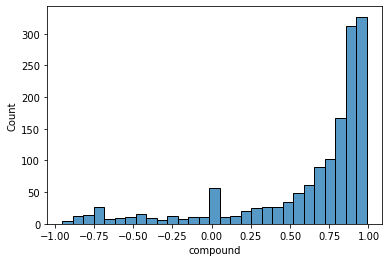

In [18]:
sns.histplot(P['compound'])

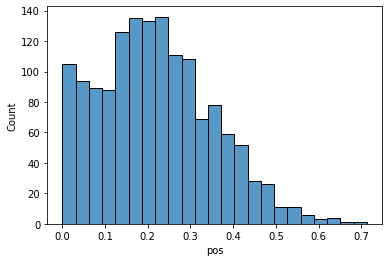

In [19]:
sns.histplot(P['pos'])

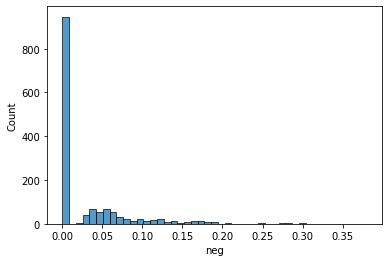

In [20]:
sns.histplot(P['neg'])

In [21]:
(P['compound']<-0).groupby(P['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Beach Bar                                             11
China Inn Cafe                                         5
Dibuk restaurant                                       4
Fuji Japanese Restaurant - Central Festival Phuket     4
Honeymoon Thai Restaurant by Kenya                     6
Kopitiam by Wilai                                      3
Le Siam                                               26
MK Gold Restaurant                                    20
Mr.Coffee                                              5
OSOT                                                   1
Pizza Hut - Jungceylon                                37
Rider Cafe                                             5
Savoy Patong                                          17
Suay Restaurant                                        3
The Cook                                              10
Name: compound, dtype: int64

In [22]:
percent_negative = pd.DataFrame((P['compound']<=0).groupby(P['Hotel/Restaurant name']).sum()
                                /P['Hotel/Restaurant name'].groupby(P['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews') 

percent_negative                                 

,% negative reviews
Hotel/Restaurant name,
OSOT,3.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
China Inn Cafe,6.060606
Mr.Coffee,7.000000
Rider Cafe,7.000000
Suay Restaurant,7.000000
Kopitiam by Wilai,10.000000
Honeymoon Thai Restaurant by Kenya,10.638298
The Cook,11.956522


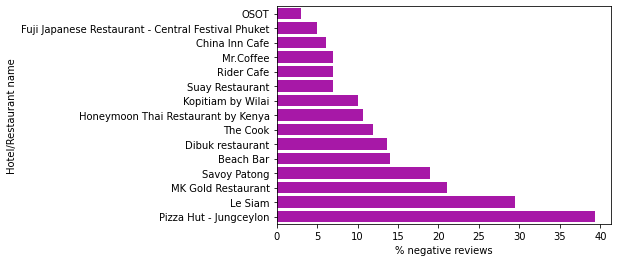

In [23]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='m')

In [24]:
reviews_negative_subset = P.loc[(P['Hotel/Restaurant name']== 'Pizza Hut - Jungceylon') 
                                & (P['compound']<=0),:]
reviews_negative_subset.head                                

<bound method NDFrame.head of                ID                   Review Date      Location  \
1375  rn579775211          Reviewed 1 week ago    Phuket Town   
1379  rn567681816      Reviewed March 20, 2018    Phuket Town   
1380  rn562985064   Reviewed February 26, 2018    Phuket Town   
1381  rn558515004    Reviewed February 4, 2018    Phuket Town   
1386  rn546394714   Reviewed December 10, 2017    Phuket Town   
1388  rn544922325    Reviewed December 3, 2017    Phuket Town   
1392  rn522046872   Reviewed September 6, 2017    Phuket Town   
1395  rn462209331   Reviewed February 23, 2017    Phuket Town   
1400  rn454761973    Reviewed January 25, 2017    Phuket Town   
1401  rn453948786    Reviewed January 22, 2017    Phuket Town   
1402  rn447424574   Reviewed December 29, 2016    Phuket Town   
1403  rn444140774   Reviewed December 13, 2016    Phuket Town   
1406  rn432600940    Reviewed October 29, 2016    Phuket Town   
1407  rn427667124    Reviewed October 13, 2016    Phuket Tow

<function matplotlib.pyplot.show(*args, **kw)>

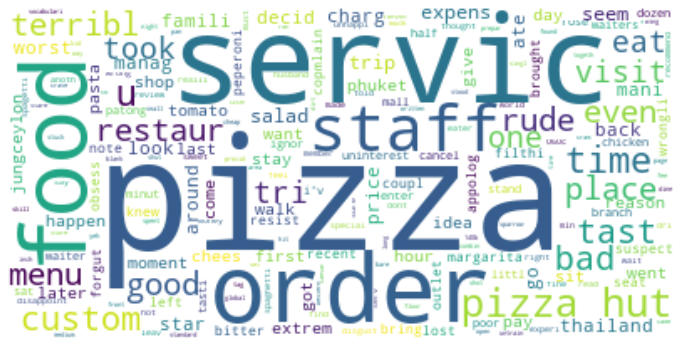

In [25]:
neg_tokens = [word for review in reviews_negative_subset['preprocessed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [26]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

 pizza servic  order   food    hut  staff   time   like   tast    bad 
    47     19     14     13     12     12     10      9      8      8 


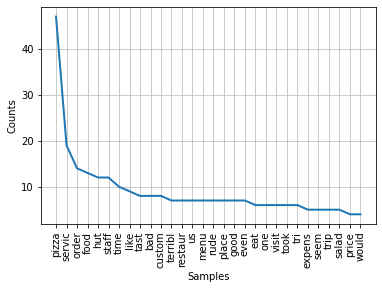

In [27]:
neg_freqdist.plot(30)

In [28]:
(P['compound']>0).groupby(P['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Beach Bar                                             86
China Inn Cafe                                        93
Dibuk restaurant                                      82
Fuji Japanese Restaurant - Central Festival Phuket    95
Honeymoon Thai Restaurant by Kenya                    84
Kopitiam by Wilai                                     90
Le Siam                                               67
MK Gold Restaurant                                    79
Mr.Coffee                                             93
OSOT                                                  97
Pizza Hut - Jungceylon                                60
Rider Cafe                                            93
Savoy Patong                                          81
Suay Restaurant                                       93
The Cook                                              81
Name: compound, dtype: int64

In [29]:
percent_positive = pd.DataFrame((P['compound']>0).groupby(P['Hotel/Restaurant name']).sum()
                                /P['Hotel/Restaurant name'].groupby(P['Hotel/Restaurant name']).count()*100,
                                columns=['% positive reviews']).sort_values(by='% positive reviews') 

percent_positive 

,% positive reviews
Hotel/Restaurant name,
Pizza Hut - Jungceylon,60.606061
Le Siam,70.526316
MK Gold Restaurant,79.000000
Savoy Patong,81.000000
Beach Bar,86.000000
Dibuk restaurant,86.315789
The Cook,88.043478
Honeymoon Thai Restaurant by Kenya,89.361702
Kopitiam by Wilai,90.000000


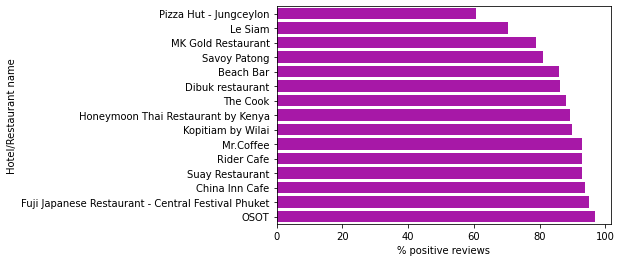

In [30]:
sns.barplot(data=percent_positive, x='% positive reviews', y=percent_positive.index, color='m')

In [31]:
reviews_positive_subset = P.loc[(P['Hotel/Restaurant name']== 'OSOT') 
                                & (P['compound']>0),:]
reviews_positive_subset.head                                

<bound method NDFrame.head of               ID               Review Date      Location  \
194  rn580759667      Reviewed 4 days ago    Phuket Town   
195  rn578537420      Reviewed 1 week ago    Phuket Town   
196  rn577610325     Reviewed 2 weeks ago    Phuket Town   
197  rn576028140     Reviewed 3 weeks ago    Phuket Town   
198  rn573411424     Reviewed 5 weeks ago    Phuket Town   
..           ...                       ...           ...   
289  rn377539771    Reviewed May 29, 2016    Phuket Town   
290  rn375759453    Reviewed May 23, 2016    Phuket Town   
291  rn372996158    Reviewed May 15, 2016    Phuket Town   
292  rn365095837  Reviewed April 18, 2016    Phuket Town   
293  rn360026523  Reviewed March 30, 2016    Phuket Town   

    Hotel/Restaurant name                                             Review  \
194                  OSOT  Really good pizza margarita & pasta's. The dou...   
195                  OSOT  The pizzas we ordered came quickly and were re...   
196      

<function matplotlib.pyplot.show(*args, **kw)>

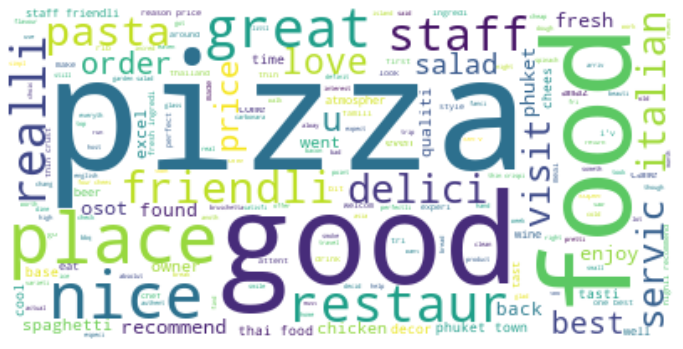

In [32]:
pos_tokens = [word for review in reviews_positive_subset['preprocessed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [33]:
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   pizza     food     good    place     nice    staff friendli    great  restaur   realli 
      90       55       50       44       38       28       28       27       24       21 


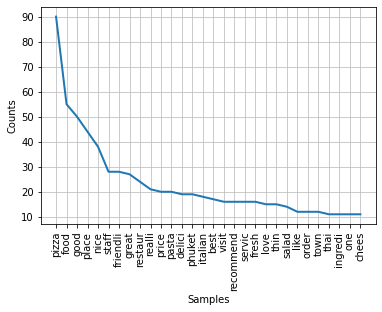

In [35]:
pos_freqdist.plot(30)

In [36]:
K['preprocessed_review'] = K['Review'].apply(preprocess_text)

<ipython-input-36-c7f0f2865c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K['preprocessed_review'] = K['Review'].apply(preprocess_text)


In [37]:
K.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,preprocessed_review
1474,rn580813706,Reviewed 3 days ago,Karon,Ging Restaurant,Awesome food excellent service what a lovely p...,"[awesom, food, excel, servic, love, place, can..."
1475,rn579438465,Reviewed 1 week ago,Karon,Ging Restaurant,Ging is a very authentic Thai restaurant with ...,"[ging, authent, thai, restaur, great, food, wi..."
1476,rn578416780,Reviewed 2 weeks ago,Karon,Ging Restaurant,Well located near the old Phuket resort on Kar...,"[well, locat, near, old, phuket, resort, karon..."
1477,rn576719244,Reviewed 2 weeks ago,Karon,Ging Restaurant,There are plenty of restaurants in this area b...,"[plenti, restaur, area, ging, stand, term, fri..."
1478,rn575308670,Reviewed 3 weeks ago,Karon,Ging Restaurant,I chose to leave a review for this place becau...,"[chose, leav, review, place, us, highlight, nu..."


In [38]:
K['compound'] = [sentiment.polarity_scores(review)['compound'] for review in K['Review']]
K['neg'] = [sentiment.polarity_scores(review)['neg'] for review in K['Review']]
K['neu'] = [sentiment.polarity_scores(review)['neu'] for review in K['Review']]
K['pos'] = [sentiment.polarity_scores(review)['pos'] for review in K['Review']]


<ipython-input-38-57359ded1f36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K['compound'] = [sentiment.polarity_scores(review)['compound'] for review in K['Review']]
<ipython-input-38-57359ded1f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K['neg'] = [sentiment.polarity_scores(review)['neg'] for review in K['Review']]
<ipython-input-38-57359ded1f36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [39]:
K.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,preprocessed_review,compound,neg,neu,pos
1474,rn580813706,Reviewed 3 days ago,Karon,Ging Restaurant,Awesome food excellent service what a lovely p...,"[awesom, food, excel, servic, love, place, can...",0.9522,0.000,0.447,0.553
1475,rn579438465,Reviewed 1 week ago,Karon,Ging Restaurant,Ging is a very authentic Thai restaurant with ...,"[ging, authent, thai, restaur, great, food, wi...",0.9460,0.000,0.718,0.282
1476,rn578416780,Reviewed 2 weeks ago,Karon,Ging Restaurant,Well located near the old Phuket resort on Kar...,"[well, locat, near, old, phuket, resort, karon...",0.9612,0.000,0.594,0.406
1477,rn576719244,Reviewed 2 weeks ago,Karon,Ging Restaurant,There are plenty of restaurants in this area b...,"[plenti, restaur, area, ging, stand, term, fri...",0.6486,0.000,0.903,0.097
1478,rn575308670,Reviewed 3 weeks ago,Karon,Ging Restaurant,I chose to leave a review for this place becau...,"[chose, leav, review, place, us, highlight, nu...",0.7783,0.026,0.779,0.195


In [40]:
K[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.654687,0.026679,0.737805,0.235505
std,0.421648,0.051233,0.126921,0.135879
min,-0.886000,0.000000,0.300000,0.000000
25%,0.577700,0.000000,0.655000,0.130000
50%,0.838450,0.000000,0.745000,0.221000
75%,0.927225,0.041000,0.829000,0.330000
max,0.990000,0.338000,1.000000,0.700000


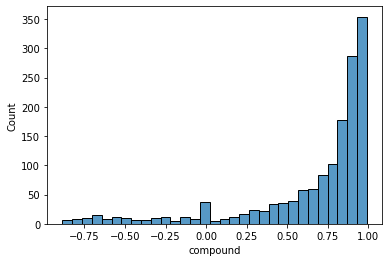

In [41]:
sns.histplot(K['compound'])

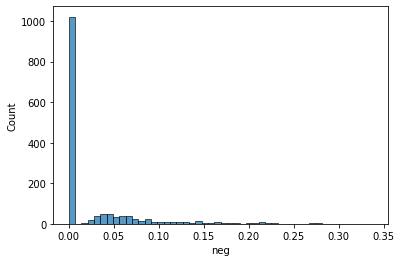

In [42]:
sns.histplot(K['neg'])

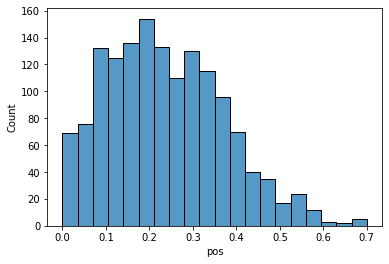

In [43]:
sns.histplot(K['pos'])

In [44]:
(K['compound']<-0).groupby(K['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
2gether Restaurant                    8
Ann Restaurant                       12
Baan Sailom Restaurant               15
Bob's Restaurant & Bar                9
Butterfly Bistro                      7
Chez Bernard                          3
Churrasco Phuket Steakhouse           5
Coral Restaurant                      7
Da Mario Karon                       20
Elephant Cafe by Tan                  7
Food Market Kata                     12
Ging Restaurant                       5
Jao Jong Seafood                     12
Karlsson Restaurant & Steak House     6
Kata Villa Restaurant                 7
Name: compound, dtype: int64

In [45]:
percent_negative = pd.DataFrame((K['compound']<=0).groupby(K['Hotel/Restaurant name']).sum()
                                /K['Hotel/Restaurant name'].groupby(K['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews') 

percent_negative                                 

,% negative reviews
Hotel/Restaurant name,
Churrasco Phuket Steakhouse,5.000000
Chez Bernard,5.208333
Ging Restaurant,7.000000
Butterfly Bistro,8.000000
Coral Restaurant,8.000000
Elephant Cafe by Tan,9.000000
Bob's Restaurant & Bar,9.677419
Karlsson Restaurant & Steak House,10.000000
Kata Villa Restaurant,10.000000


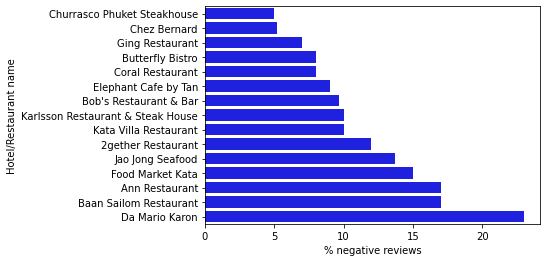

In [46]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='b')

In [49]:
reviews_negative_subset = K.loc[(K['Hotel/Restaurant name']== 'Da Mario Karon') 
                                & (K['compound']<=0),:]
reviews_negative_subset.head                                

<bound method NDFrame.head of                ID                  Review Date Location Hotel/Restaurant name  \
2563  rn576484166        Reviewed 3 weeks ago     Karon        Da Mario Karon   
2566  rn560355619  Reviewed February 13, 2018     Karon        Da Mario Karon   
2567  rn557447730   Reviewed January 30, 2018     Karon        Da Mario Karon   
2569  rn551721900    Reviewed January 5, 2018     Karon        Da Mario Karon   
2570  rn549418001  Reviewed December 26, 2017     Karon        Da Mario Karon   
2572  rn547156333  Reviewed December 14, 2017     Karon        Da Mario Karon   
2584  rn499648046       Reviewed July 8, 2017     Karon        Da Mario Karon   
2586  rn498438102       Reviewed July 3, 2017     Karon        Da Mario Karon   
2593  rn472854971      Reviewed April 5, 2017     Karon        Da Mario Karon   
2594  rn470606756     Reviewed March 27, 2017     Karon        Da Mario Karon   
2598  rn446822711  Reviewed December 26, 2016     Karon        Da Mario Karon  

<function matplotlib.pyplot.show(*args, **kw)>

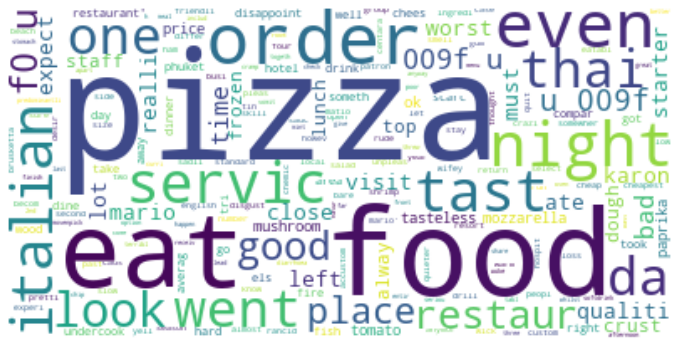

In [50]:
neg_tokens = [word for review in reviews_negative_subset['preprocessed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [51]:
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

  pizza       u    food     eat   order    even   night    tast  servic italian 
     20      15      12       9       8       7       7       6       6       6 


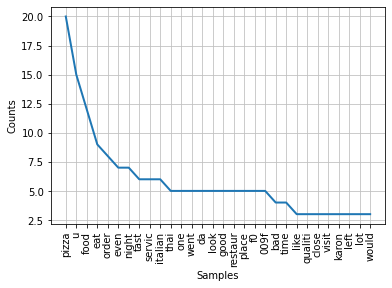

In [52]:
neg_freqdist.plot(30)

In [53]:
(K['compound']>0).groupby(K['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
2gether Restaurant                   88
Ann Restaurant                       83
Baan Sailom Restaurant               83
Bob's Restaurant & Bar               84
Butterfly Bistro                     92
Chez Bernard                         91
Churrasco Phuket Steakhouse          95
Coral Restaurant                     92
Da Mario Karon                       77
Elephant Cafe by Tan                 91
Food Market Kata                     85
Ging Restaurant                      93
Jao Jong Seafood                     82
Karlsson Restaurant & Steak House    90
Kata Villa Restaurant                90
Name: compound, dtype: int64

In [54]:
percent_positive = pd.DataFrame((K['compound']>0).groupby(K['Hotel/Restaurant name']).sum()
                                /K['Hotel/Restaurant name'].groupby(K['Hotel/Restaurant name']).count()*100,
                                columns=['% positive reviews']).sort_values(by='% positive reviews') 

percent_positive                                 

,% positive reviews
Hotel/Restaurant name,
Da Mario Karon,77.000000
Ann Restaurant,83.000000
Baan Sailom Restaurant,83.000000
Food Market Kata,85.000000
Jao Jong Seafood,86.315789
2gether Restaurant,88.000000
Karlsson Restaurant & Steak House,90.000000
Kata Villa Restaurant,90.000000
Bob's Restaurant & Bar,90.322581


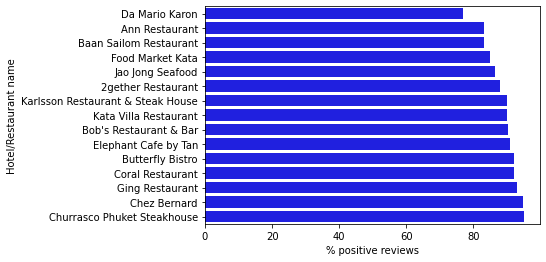

In [55]:
sns.barplot(data=percent_positive, x='% positive reviews', y=percent_positive.index, color='b')

In [56]:
reviews_positive_subset = K.loc[(K['Hotel/Restaurant name']== 'Churrasco Phuket Steakhouse') 
                                & (K['compound']>0),:]
reviews_positive_subset.head                                

<bound method NDFrame.head of                ID                  Review Date Location  \
1775  rn569187510     Reviewed March 27, 2018     Karon   
1776  rn579295336         Reviewed 1 week ago     Karon   
1777  rn576172585        Reviewed 3 weeks ago     Karon   
1778  rn575893476        Reviewed 3 weeks ago     Karon   
1779  rn575301554        Reviewed 3 weeks ago     Karon   
...           ...                          ...      ...   
1869  rn469505090     Reviewed March 22, 2017     Karon   
1870  rn468763770     Reviewed March 20, 2017     Karon   
1871  rn467742286     Reviewed March 16, 2017     Karon   
1872  rn464773237      Reviewed March 5, 2017     Karon   
1873  rn463586326  Reviewed February 28, 2017     Karon   

            Hotel/Restaurant name  \
1775  Churrasco Phuket Steakhouse   
1776  Churrasco Phuket Steakhouse   
1777  Churrasco Phuket Steakhouse   
1778  Churrasco Phuket Steakhouse   
1779  Churrasco Phuket Steakhouse   
...                           ...   
18

<function matplotlib.pyplot.show(*args, **kw)>

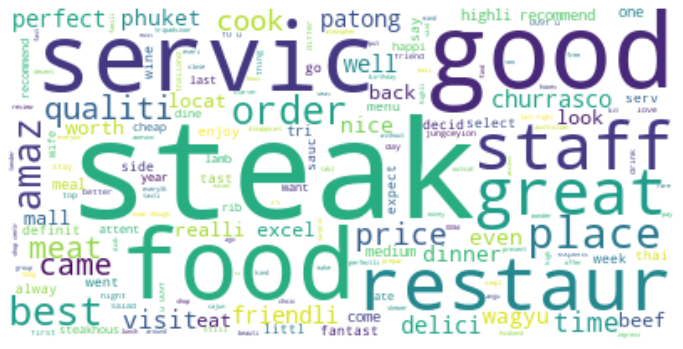

In [59]:
pos_tokens = [word for review in reviews_positive_subset['preprocessed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [60]:
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

  steak    good    food  servic restaur   staff   great   place       u    best 
     69      35      30      28      25      25      25      21      21      18 


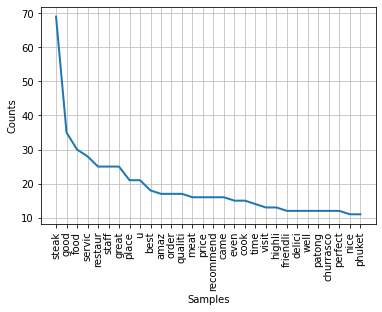

In [61]:
pos_freqdist.plot(30)